# 3. Machine Learning for classification

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [4]:
!wget $data -O dataset.csv

--2025-10-10 20:01:08--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 240.2.18.239
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|240.2.18.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>] 954.59K  1.65MB/s    in 0.6s    

2025-10-10 20:01:09 (1.65 MB/s) - ‘dataset.csv’ saved [977501/977501]



In [5]:
df = pd.read_csv('./dataset.csv')

In [6]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [8]:
df.head(5).T

0             1               2  \
customerid              7590-vhveg    5575-gnvde      3668-qpybk   
gender                      female          male            male   
seniorcitizen                    0             0               0   
partner                        yes            no              no   
dependents                      no            no              no   
tenure                           1            34               2   
phoneservice                    no           yes             yes   
multiplelines     no_phone_service            no              no   
internetservice                dsl           dsl             dsl   
onlinesecurity                  no           yes             yes   
onlinebackup                   yes            no             yes   
deviceprotection                no           yes              no   
techsupport                     no            no              no   
streamingtv                     no            no              no   
streamingmovies                 no            no              no   
contract            month-to-month      one_year  month-to-month   
paperlessbilling               yes            no             yes   
paymentmethod     electronic_check  mailed_check    mailed_check   
monthlycharges               29.85         56.95           53.85   
totalcharges                 29.85        1889.5          108.15   
churn                           no            no             yes   

                                          3                 4  
customerid                       7795-cfocw        9237-hqitu  
gender                                 male            female  
seniorcitizen                             0                 0  
partner                                  no                no  
dependents                               no                no  
tenure                                   45                 2  
phoneservice                             no               yes  
multiplelines              no_phone_service                no  
internetservice                         dsl       fiber_optic  
onlinesecurity                          yes                no  
onlinebackup                             no                no  
deviceprotection                        yes                no  
techsupport                             yes                no  
streamingtv                              no                no  
streamingmovies                          no                no  
contract                           one_year    month-to-month  
paperlessbilling                         no               yes  
paymentmethod     bank_transfer_(automatic)  electronic_check  
monthlycharges                         42.3              70.7  
totalcharges                        1840.75            151.65  
churn                                    no               yes

In [9]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [10]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges'] = df['totalcharges'].fillna(0)

In [11]:
df['churn'] = (df.churn == 'yes').astype(int)
df['churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

## 3.3 Setting validation framework

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [14]:
df_full_train.shape, df_test.shape

((5634, 21), (1409, 21))

In [15]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [16]:
df_train.shape, df_val.shape

((4225, 21), (1409, 21))

In [17]:
for df in df_train, df_val, df_test:
    df = df.reset_index(drop=True)

In [18]:
y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA

In [19]:
df_full_train = df_full_train.reset_index(drop=True)

In [20]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [21]:
df_full_train['churn'].value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [22]:
global_churn_rate = df_full_train['churn'].mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [23]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [24]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [25]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [26]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges']

In [27]:
df_full_train[categorical].nunique()

gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1494
totalcharges        5291
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio

Feture importance analysis (part of EDA) - identifying which features affect our target variable

* Churn rate
* Risk ratio
* Mutual information - later

### Chrun rate

In [28]:
df_full_train.head()

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  5442-pptjy    male              0     yes        yes      12          yes   
1  6261-rcvns  female              0      no         no      42          yes   
2  2176-osjuv    male              0     yes         no      71          yes   
3  6161-erdgd    male              0     yes        yes      71          yes   
4  2364-ufrom    male              0      no         no      30          yes   

  multiplelines internetservice       onlinesecurity  ...  \
0            no              no  no_internet_service  ...   
1            no             dsl                  yes  ...   
2           yes             dsl                  yes  ...   
3           yes             dsl                  yes  ...   
4            no             dsl                  yes  ...   

      deviceprotection          techsupport          streamingtv  \
0  no_internet_service  no_internet_service  no_internet_service   
1                  yes                  yes                   no   
2                   no                  yes                   no   
3                  yes                  yes                  yes   
4                   no                  yes                  yes   

       streamingmovies  contract paperlessbilling              paymentmethod  \
0  no_internet_service  two_year               no               mailed_check   
1                  yes  one_year               no    credit_card_(automatic)   
2                   no  two_year               no  bank_transfer_(automatic)   
3                  yes  one_year               no           electronic_check   
4                   no  one_year               no           electronic_check   

  monthlycharges  totalcharges  churn  
0          19.70        258.35      0  
1          73.90       3160.55      1  
2          65.15       4681.75      0  
3          85.45       6300.85      0  
4          70.40       2044.75      0  

[5 rows x 21 columns]

In [29]:
churn_male = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male

np.float64(0.27682403433476394)

In [30]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [31]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [32]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [33]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [34]:
global_churn - churn_partner

np.float64(0.06493474245795922)

In [35]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [36]:
global_churn - churn_no_partner

np.float64(-0.05984095297455855)

1. Differency of churn rate
    * `global - group`
        * if `>0` - less likely to churn
        * if `<0` - more likely to churn

In [37]:
churn_no_partner / global_churn

np.float64(1.2216593879412643)

In [38]:
churn_partner / global_churn

np.float64(0.7594724924338315)

### Risk ratio

`risk = group / global`

* if `>0` - less likely to churn
* if `<0` - more likely to churn

In [39]:
from IPython.display import display

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980



seniorcitizen


mean  count      diff      risk
seniorcitizen                                     
0              0.242270   4722 -0.027698  0.897403
1              0.413377    912  0.143409  1.531208



partner


mean  count      diff      risk
partner                                     
no       0.329809   2932  0.059841  1.221659
yes      0.205033   2702 -0.064935  0.759472



dependents


mean  count      diff      risk
dependents                                     
no          0.313760   3968  0.043792  1.162212
yes         0.165666   1666 -0.104302  0.613651



tenure


mean  count      diff      risk
tenure                                     
0       0.000000      8 -0.269968  0.000000
1       0.635052    485  0.365083  2.352321
2       0.520619    194  0.250651  1.928445
3       0.448485    165  0.178517  1.661252
4       0.493151    146  0.223183  1.826700
...          ...    ...       ...       ...
68      0.102564     78 -0.167404  0.379912
69      0.092105     76 -0.177863  0.341171
70      0.125000     88 -0.144968  0.463018
71      0.027211    147 -0.242757  0.100793
72      0.014134    283 -0.255834  0.052355

[73 rows x 4 columns]



phoneservice


mean  count      diff      risk
phoneservice                                     
no            0.241316    547 -0.028652  0.893870
yes           0.273049   5087  0.003081  1.011412



multiplelines


mean  count      diff      risk
multiplelines                                        
no                0.257407   2700 -0.012561  0.953474
no_phone_service  0.241316    547 -0.028652  0.893870
yes               0.290742   2387  0.020773  1.076948



internetservice


mean  count      diff      risk
internetservice                                     
dsl              0.192347   1934 -0.077621  0.712482
fiber_optic      0.425171   2479  0.155203  1.574895
no               0.077805   1221 -0.192163  0.288201



onlinesecurity


mean  count      diff      risk
onlinesecurity                                          
no                   0.420921   2801  0.150953  1.559152
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.153226   1612 -0.116742  0.567570



onlinebackup


mean  count      diff      risk
onlinebackup                                            
no                   0.404323   2498  0.134355  1.497672
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.217232   1915 -0.052736  0.804660



deviceprotection


mean  count      diff      risk
deviceprotection                                        
no                   0.395875   2473  0.125907  1.466379
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.230412   1940 -0.039556  0.853480



techsupport


mean  count      diff      risk
techsupport                                             
no                   0.418914   2781  0.148946  1.551717
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.159926   1632 -0.110042  0.592390



streamingtv


mean  count      diff      risk
streamingtv                                             
no                   0.342832   2246  0.072864  1.269897
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.302723   2167  0.032755  1.121328



streamingmovies


mean  count      diff      risk
streamingmovies                                         
no                   0.338906   2213  0.068938  1.255358
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.307273   2200  0.037305  1.138182



contract


mean  count      diff      risk
contract                                           
month-to-month  0.431701   3104  0.161733  1.599082
one_year        0.120573   1186 -0.149395  0.446621
two_year        0.028274   1344 -0.241694  0.104730



paperlessbilling


mean  count      diff      risk
paperlessbilling                                     
no                0.172071   2313 -0.097897  0.637375
yes               0.338151   3321  0.068183  1.252560



paymentmethod


mean  count      diff      risk
paymentmethod                                                 
bank_transfer_(automatic)  0.168171   1219 -0.101797  0.622928
credit_card_(automatic)    0.164339   1217 -0.105630  0.608733
electronic_check           0.455890   1893  0.185922  1.688682
mailed_check               0.193870   1305 -0.076098  0.718121



monthlycharges


mean  count      diff      risk
monthlycharges                                 
18.25            0.0      1 -0.269968  0.000000
18.40            0.0      1 -0.269968  0.000000
18.55            0.0      1 -0.269968  0.000000
18.70            0.0      1 -0.269968  0.000000
18.75            0.0      1 -0.269968  0.000000
...              ...    ...       ...       ...
117.80           1.0      1  0.730032  3.704142
118.20           0.0      1 -0.269968  0.000000
118.35           1.0      1  0.730032  3.704142
118.60           0.0      1 -0.269968  0.000000
118.65           0.0      1 -0.269968  0.000000

[1494 rows x 4 columns]



totalcharges


mean  count      diff      risk
totalcharges                                 
0.00           0.0      8 -0.269968  0.000000
18.80          0.0      1 -0.269968  0.000000
18.85          0.5      2  0.230032  1.852071
18.90          0.0      1 -0.269968  0.000000
19.00          0.0      1 -0.269968  0.000000
...            ...    ...       ...       ...
8547.15        0.0      1 -0.269968  0.000000
8564.75        0.0      1 -0.269968  0.000000
8594.40        0.0      1 -0.269968  0.000000
8670.10        0.0      1 -0.269968  0.000000
8684.80        1.0      1  0.730032  3.704142

[5291 rows x 4 columns]

## 3.6 Mutual information

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

In [40]:
from sklearn.metrics import mutual_info_score

mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [41]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [42]:
mutual_info_score(df_full_train.churn, df_full_train.phoneservice)

0.00022871269738296285

In [43]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train['churn'])

In [44]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

/Users/vadim.sokoltsov/learning/datatalks.club/.venv/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/vadim.sokoltsov/learning/datatalks.club/.venv/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


totalcharges        0.547955
monthlycharges      0.196561
contract            0.098320
tenure              0.081713
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance - Correlation

In [45]:
df_full_train.tenure.max()

np.int64(72)

In [46]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [47]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [48]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [49]:
df_full_train[df_full_train.tenure <= 12].churn.mean()

np.float64(0.47586598523566154)

In [50]:
df_full_train[df_full_train['monthlycharges'] <= 20].churn.mean()

np.float64(0.08795411089866156)

In [51]:
df_full_train[(df_full_train['monthlycharges'] > 20) & (df_full_train['monthlycharges'] <= 50)].churn.mean()

np.float64(0.18340943683409436)

# 3.8 One-hot encoding

* Use scikit-learn to encode categorical features

In [52]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_30784/535437261.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dicts = df_train[categorical + numerical].to_dict(orient='records')


In [53]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [54]:
X_train = dv.fit_transform(train_dicts)

In [55]:
X_train.shape

(4225, 45)

In [56]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_30784/2096832447.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dicts = df_val[categorical + numerical].to_dict(orient='records')


In [57]:
X_val = dv.transform(val_dicts)

## 3.9 Logistic regression

* Binary classification
* Linear vs Logistic regression

In [58]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [59]:
z = np.linspace(-7, 7, 51)

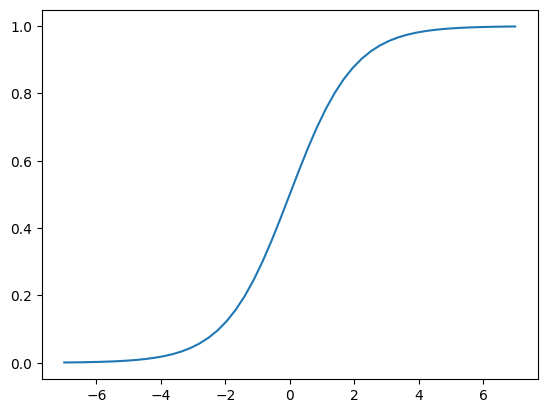

In [60]:
plt.plot(z, sigmoid(z))

In [61]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

In [62]:
def logistic_regression(xi):
    result = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-learn

* Train a model with Scikit-learn
* Apply it to the validation dataset
* Calculate the accuracy

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/vadim.sokoltsov/learning/datatalks.club/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
model.intercept_[0]

np.float64(-0.10891892654487528)

In [66]:
model.coef_[0].round(3)

array([ 0.476, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.062, -0.089, -0.081,  0.265, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.059, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.249,  0.216, -0.121, -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [67]:
# hard prections
model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [68]:
# soft predictions
y_pred = model.predict_proba(X_val)[:, 1]

In [69]:
y_pred

array([0.00901526, 0.2050065 , 0.21261608, ..., 0.13650369, 0.79950925,
       0.83717868], shape=(1409,))

In [70]:
churn_decision = (y_pred >= 0.5)

In [71]:
df_val[churn_decision].customerid

2504    8433-wxgna
4597    3440-jpscl
2343    2637-fkfsy
5591    7228-omtpn
4482    6711-fldfb
           ...    
2611    5976-jcjrh
4211    2034-cgrhz
3999    5276-kqwhg
6240    6521-yytyi
5282    3049-solay
Name: customerid, Length: 311, dtype: object

In [72]:
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [73]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [74]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [75]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

## 3.11 Model interpretation

* Look at the coefficients
* Train a smaller model with fewer features

In [76]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.476),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.408),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.335),
 'internetservice=fiber_optic': np.float64(0.317),
 'internetservice=no': np.float64(-0.089),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.142),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.062),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.265),
 'onlinesecurity=no_internet_service': np.float64(-0.089),
 'onlinesecurity=yes'

In [77]:
small = ['contract', 'tenure', 'monthlycharges']

In [78]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [79]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [80]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [81]:
X_train_small = dv_small.transform(dicts_train_small)

In [82]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [83]:
w0 =model_small.intercept_[0]
w0

np.float64(-2.477957596265891)

In [84]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [85]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [86]:
-2.47 + 0.97 + 60 * 0.027 + 2 * (-0.036)

0.04799999999999967

In [87]:
sigmoid(_)

np.float64(0.5119976965307178)

## 3.12 Using the model

In [88]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_30784/2234278264.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')


In [89]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [90]:
y_full_train = df_full_train.churn.values

In [91]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

/Users/vadim.sokoltsov/learning/datatalks.club/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
dict_test = df_test[categorical + numerical].to_dict(orient='records')

/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_30784/191010298.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dict_test = df_test[categorical + numerical].to_dict(orient='records')


In [93]:
X_test =dv.transform(dict_test)

In [94]:
y_pred = model.predict_proba(X_test)[:, 1]

In [95]:
churn_decision = (y_pred >= 0.5)

In [96]:
(churn_decision == y_test).mean()

np.float64(0.8140525195173882)

In [97]:
customer = dict_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'tenure': 32,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [98]:
X_small = dv.transform([customer])

In [99]:
X_small.shape

(1, 45)

In [100]:
model.predict_proba(X_small)

array([[0.50395859, 0.49604141]])

In [101]:
y_test[10]

np.int64(0)

In [102]:
np.sqrt((0.2 * (1 - 0.2)) / 200) * 1.645

np.float64(0.04652762620207483)

In [106]:
n =100
mu = 10
me = 10

(me * np.sqrt(n)) / mu

np.float64(10.0)